###  TO be done : Fix latlon to degrees converter

In [9]:
from astropy.time import Time
from astroplan import download_IERS_A 
import pandas as pd
from astropy.coordinates import EarthLocation
from astroplan import Observer,FixedTarget
from astroplan.plots import plot_airmass,plot_altitude
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import common_timezones

%matplotlib inline

In [10]:
import re

def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction == 'S' or direction == 'W':
        dd *= -1
    return dd;

def dd2dms(deg):
    d = int(deg)
    md = abs(deg - d) * 60
    m = int(md)
    sd = (md - m) * 60
    return [d, m, sd]

def parse_dms(dms):
    parts = re.split('[^\d\w]+', dms)
    lat = dms2dd(parts[0], parts[1], parts[2], parts[3])
    lng = dms2dd(parts[4], parts[5], parts[6], parts[7])

    return (lat, lng)

In [12]:
#Plot airmass of RA and DEC, given date range, given Telescope’s long, lat, altitude

ra=str(input("Enter the Right Ascenscion(RA) of Source in 00h00m00s formati.e 20h42m30s: "))
dec=str(input("Enter the Declination(DEC) of Source in 00d00m00s formati.e +40h22m50s: "))
frame=str(input("Enter the frame of ocoordinates in string format, ie icrs,FK5,FK4: "))
#print('you have entered Right Ascension of'+' '+ra,', Declination of' +' '+dec)
#139d31m24.765s -12d05m43.99s

target = SkyCoord(ra, dec, frame=frame,  unit=(u.hourangle, u.deg))

print(target)


Enter the Right Ascenscion(RA) of Source in 00h00m00s formati.e 20h42m30s: 139d31m24.765s
Enter the Declination(DEC) of Source in 00d00m00s formati.e +40h22m50s: -12d05m43.99s
Enter the frame of ocoordinates in string format, ie icrs,FK5,FK4: icrs
<SkyCoord (ICRS): (ra, dec) in deg
    (139.52354583, -12.09555278)>


In [40]:
name=str(input("Enter the Name of Telescope or observatory : "))
lat=str(input("Enter the latitude of Telescope in 00° 00′ 00″ W format i.e 79° 58′ 56″ W: "))
lon=str(input("Enter the Longitude (lon) of Telescope in 00° 00′ 00″ N format i.e 40° 26′ 46″ N: "))
elev=str(input("Enter the altitude/elevation(elev) of Telescope in meters i.e 220m: "))

#dd = parse_dms("36°57'9' N 110°4'21' W")



Enter the Name of Telescope or observatory : meerkat
Enter the latitude of Telescope in 00° 00′ 00″ W format i.e 79° 58′ 56″ W: 36°57'9' N
Enter the Longitude (lon) of Telescope in 00° 00′ 00″ N format i.e 40° 26′ 46″ N: 110°4'21' W
Enter the altitude/elevation(elev) of Telescope in meters i.e 220m: 1000


In [50]:
#print(common_timezones)

zone=str(input("Enter the Name of Telescope or observatory : "))

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

KeyboardInterrupt: 

In [42]:

coords=str(lat+" "+lon)
print(coords)
dd = parse_dms(coords)
longitude,latitude=dd[1],dd[0]

print(longitude,latitude)

36°57'9' N 110°4'21' W
-110.07249999999999 36.9525


In [43]:
sta=str(input("Enter the start date of Observation in datetime yyyy-mm-dd hh:mm:ss format 2020-11-12 01:00:00: "))
end=str(input("Enter the end date of Observation in datetime yyyy-mm-dd hh:mm:ss format 2020-11-13 19:00:00': "))
start_date = Time(sta)
end_date= Time(end)
delta_t = end_date - start_date
date_range= start_date + delta_t*np.linspace(0, 1,75)
#print(date_range)

Enter the start date of Observation in datetime yyyy-mm-dd hh:mm:ss format 2020-11-12 01:00:00: 2020-11-12 01:00:00
Enter the end date of Observation in datetime yyyy-mm-dd hh:mm:ss format 2020-11-13 19:00:00': 2020-11-13 19:00:00


c = SkyCoord('00h42m39.4s', '+41d12m29.3s', frame='icrs',  unit=(u.hourangle, u.deg))
c
#ra_deg,dec_deg=c.ra.deg,c.dec.deg

In [44]:
print(longitude,latitude,elev)

-110.07249999999999 36.9525 1000


In [20]:
EarthLocation.from_geodetic?

In [45]:
location = EarthLocation.from_geodetic(float(longitude)*u.deg,float(latitude)*u.deg,float(elev)*u.m)
telescope= Observer(location=location, name=name, timezone=zone)
print(telescope)

<Observer: name='meerkat',
    location (lon, lat, el)=(-110.07249999999999 deg, 36.95250000000001 deg, 999.9999999997146 m),
    timezone=<DstTzInfo 'Africa/Johannesburg' LMT+1:52:00 STD>>


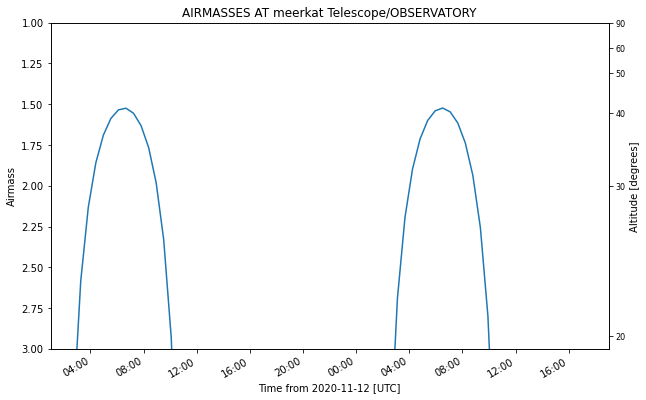

In [46]:
plt.figure(figsize=(10,6))  #Plotting Airmasses and Elevations RA and DEC of Hydra A for a given date 2020-11-11

plot_airmass(target, telescope, date_range, brightness_shading=True,altitude_yaxis=True)

plt.title('AIRMASSES AT' +' '+ name + ' '+'Telescope/OBSERVATORY',fontsize=12)
plt.xlabel('TIMES',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [ ]:

#Packed up hard valued version

#Set up target
ra='139d31m24.765s'
dec='-12d05m43.99s'
target = SkyCoord(ra, dec, frame=frame,  unit=(u.hourangle, u.deg))

print(target)

#Set up observatory
Observatory_name='MeerKat'
latitude=-30.7136921
longitude=21.44407
elev=1050

#select  timezone
#print(common_timezones)
timezone='Africa/Johannesburg'



#Input observation dates 
start= Time('2020-11-13 07:00')
end= Time('2020-11-15 19:00')
start_date = Time(start)
end_date= Time(end)
delta_t = end_date - start_date
date_range= start_date + delta_t*np.linspace(0, 1,75)


#Setup_telescope
location = EarthLocation.from_geodetic(longitude*u.deg,latitude*u.deg,elev*u.m)
telescope= Observer(location=location, name=name, timezone=timezone)
print(telescope)


plt.figure(figsize=(15,6))  #Plotting Airmasses and Elevations RA and DEC of Hydra A for a given date 2020-11-11
meerkat_styles = {'linestyle': '-', 'color': 'b', 'alpha': 0.9, 'linewidth': 2.9 }
plot_airmass(target, telescope, date_range, brightness_shading=True,altitude_yaxis=True, style_kwargs=meerkat_styles)

plt.title('AIRMASSES AT' +' '+ Observatory_name + ' '+'Telescope/Observatory',fontsize=12)
plt.xlabel('TIMES',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()


Enter the Right Ascenscion(RA) of Source in 00h00m00s formati.e 139d31m24.765s or 20h42m30s: 139d31m24.765s
Enter the Declination(DEC) of Source in 00d00m00s formati.e -12d05m43.99s or +40h22m50s: -12d05m43.99s
Enter the Name of the source in string format, ie Hydra A,Polaris,cent_A: Hydra_A
you have entered Right Ascension of 139d31m24.765s , Declination of -12d05m43.99sFrame set to ICRS


Enter the Right Ascenscion(RA) of Source in 00h00m00s formati.e 139d31m24.765s or 20h42m30s: 139d31m24.765s
Enter the Declination(DEC) of Source in 00d00m00s formati.e -12d05m43.99s or +40h22m50s: -12d05m43.99s
Enter the Name of the source in string format, ie Hydra A,Polaris,cent_A: Hydra A
you have entered Right Ascension of 139d31m24.765s , Declination of -12d05m43.99s Frame set to ICRS
Enter the name of observatory 1 i.e Meerkat: Meerkat
['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', '

Enter the select and enter time zone of Telescope or observatory No#1 i.e Africa/Johannesburg: Africa/Johannesburg
<Observer: name='Meerkat',
    location (lon, lat, el)=(21.44407 deg, -30.713692100000006 deg, 1049.9999999985284 m),
    timezone=<DstTzInfo 'Africa/Johannesburg' LMT+1:52:00 STD>>
<Observer: name='ctio',
    location (lon, lat, el)=(-70.81500000000001 deg, -30.165277777777778 deg, 2214.9999999993697 m),
    timezone=<DstTzInfo 'America/Santiago' LMT-1 day, 19:17:00 STD>>
<Observer: name='Siding Spring Observatory',
    location (lon, lat, el)=(149.06119444444445 deg, -31.273361111111104 deg, 1149.0000000015516 m),
    timezone=<DstTzInfo 'Australia/Sydney' LMT+10:05:00 STD>>
<Observer: name='ASKAP',
    location (lon, lat, el)=(116.63699999999999 deg, -26.696000000000005 deg, 377.8299999988001 m),
    timezone=<DstTzInfo 'Australia/Perth' LMT+7:43:00 STD>>
Enter the START datetime of observation in date time format i.e 2020-11-13 07:00: 2020-11-17 07:00
Enter the END dat

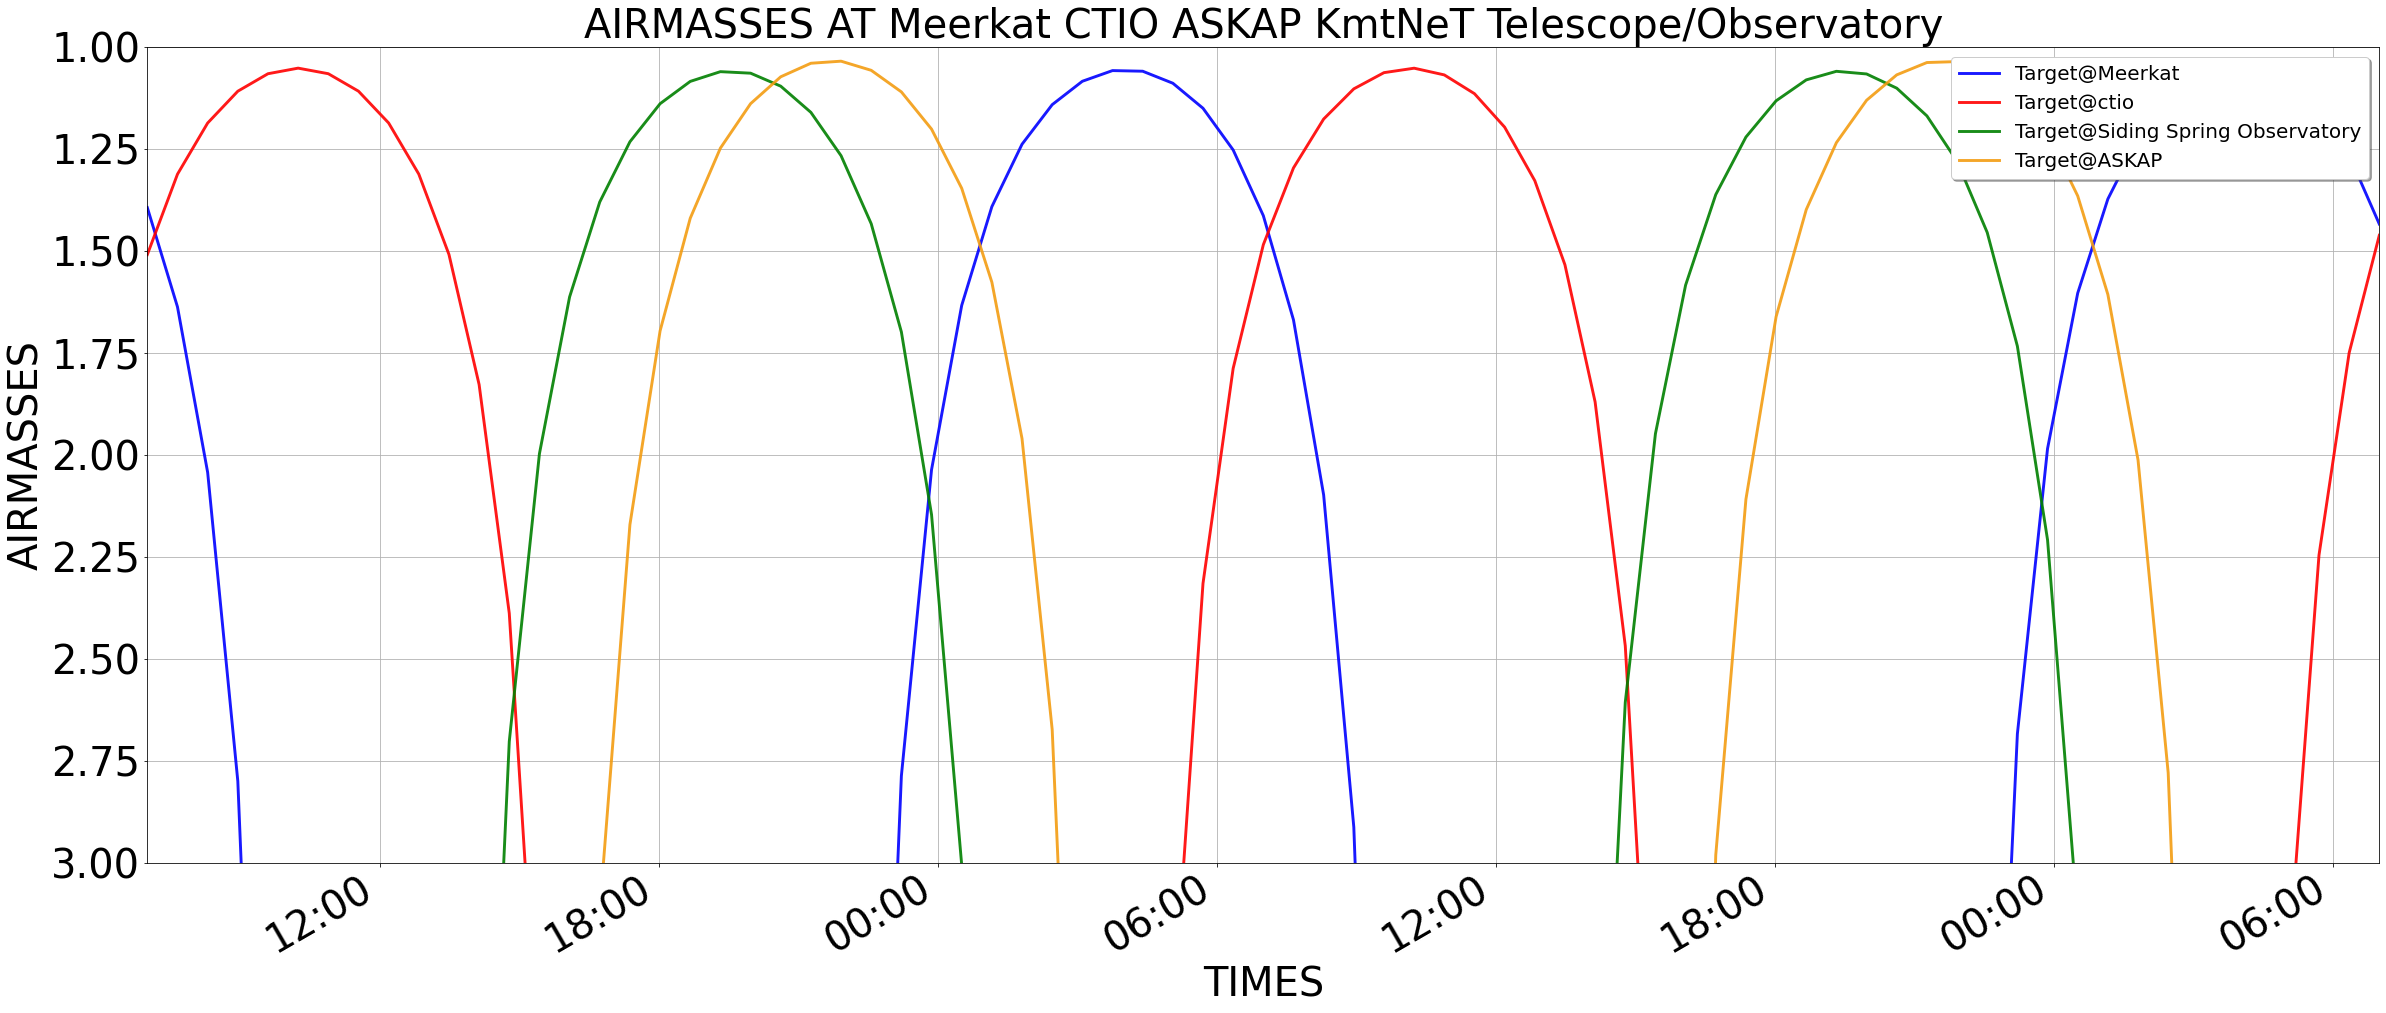

In [32]:
##Plots Airmasses and visibility time ranges of a source at several locations


#Importing modules

from astropy.time import Time
from astroplan import download_IERS_A 
import pandas as pd
from astropy.coordinates import EarthLocation
from astroplan import Observer,FixedTarget
from astroplan.plots import plot_airmass,plot_altitude
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import common_timezones

%matplotlib inline


#Check your working directory
cwd = os.getcwd() #get your work directory
cwd

#Input information of source (RA and DEC)
ra=str(input("Enter the Right Ascenscion(RA) of Source in 00h00m00s formati.e 139d31m24.765s or 20h42m30s: "))
dec=str(input("Enter the Declination(DEC) of Source in 00d00m00s formati.e -12d05m43.99s or +40h22m50s: "))
source_name=str(input("Enter the Name of the source in string format, ie Hydra A,Polaris,cent_A: "))
print('you have entered Right Ascension of'+' '+ra,', Declination of' +' '+dec+' Frame set to ICRS')


target_coord = SkyCoord(ra, dec,  unit=(u.hourangle, u.deg))

target = FixedTarget(coord=target_coord, name=source_name)
#sirius = FixedTarget(coord=sirius_coord, name="Sirius")


#Set up observatories/telescopes

Observatory_name=str(input("Enter the name of observatory 1 i.e Meerkat: "))
latitude=-30.7136921
longitude=21.44407
elev=1050

print(common_timezones)

time_zone1=str(input("Enter the select and enter time zone of Telescope or observatory No#1 i.e Africa/Johannesburg: "))


location = EarthLocation.from_geodetic(longitude*u.deg,latitude*u.deg,elev*u.m)
telescope= Observer(location=location, name=Observatory_name, timezone=time_zone1)
print(telescope)


ctio = Observer.at_site("ctio", timezone = 'America/Santiago')
print(ctio)

kmtnet = Observer.at_site("Siding Spring Observatory", timezone = 'Australia/Sydney')
print(kmtnet)


location_askap = EarthLocation.from_geodetic(116.637*u.deg,-26.696*u.deg,377.83*u.m)
askap = Observer(location=location_askap, name="ASKAP", timezone='Australia/Perth')
print(askap)





hydraA2=FixedTarget.from_name("Hydra_A", name='Target@'+ctio.name+'')  
hydraA3=FixedTarget.from_name("Hydra_A", name='Target@'+kmtnet.name+'')
hydraA4=FixedTarget.from_name("Hydra_A", name='Target@'+telescope.name+'')
hydraA5=FixedTarget.from_name("Hydra_A", name='Target@'+askap.name+'')



#Input observation dates 
start_time=str(input("Enter the START datetime of observation in date time format i.e 2020-11-13 07:00: "))
end_time=str(input("Enter the END datetime of observation in date time format i.e 2020-11-15 19:00: "))

#start_time=Time('2020-11-13 07:00')
#end_time=Time('2020-11-15 19:00')

start=Time(start_time)
end= Time(end_time)
start_date = Time(start)
end_date= Time(end)
delta_t = end_date - start_date
date_range= start_date + delta_t*np.linspace(0, 1,75)



#plot airmasses and observation times

#plt.figure(figsize=(15,6)) 
plt.figure(figsize=(40,15)) #

#observatory1_styles = {'linestyle': '-', 'color': 'b', 'alpha': 0.9, 'linewidth': 2.9 }  
#plot_airmass(target, telescope, date_range, brightness_shading=True,altitude_yaxis=True, style_kwargs=observatory1_styles)






 #Plotting Airmasses and Elevations RA and DEC of Hydra A for a given date 2020-11-11

#plot styles

observatory1_styles = {'linestyle': '-', 'color': 'b', 'alpha': 0.9, 'linewidth': 2.9 }  
ctio_styles = {'linestyle': '-', 'color': 'r', 'alpha': 0.9, 'linewidth': 2.9 } #lINES STYLES 
kmtnet_styles = {'linestyle': '-', 'color': 'g', 'alpha': 0.9, 'linewidth': 2.9 } 
#meerkat_styles = {'linestyle': '-', 'color': 'b', 'alpha': 0.9, 'linewidth': 2.9 }    
askap_styles = {'linestyle': '-', 'color': '#F39C12', 'alpha': 0.9, 'linewidth': 2.9 }    
  

#Plotting airmasses 
plot_airmass(hydraA4, telescope, date_range, style_kwargs=observatory1_styles)

plot_airmass(hydraA2, ctio,date_range,  style_kwargs=ctio_styles)

plot_airmass(hydraA3, kmtnet, date_range,  style_kwargs=kmtnet_styles)

plot_airmass(hydraA5, askap,date_range,style_kwargs=askap_styles)
  
    
plt.title('AIRMASSES AT' +' '+ Observatory_name + ' '+ ctio.name.upper()+ ' '+ askap.name+ ' '+'KmtNeT Telescope/Observatory',fontsize=40)
plt.xlabel('TIMES',fontsize=40)
plt.xticks(fontsize=40)
plt.ylabel('AIRMASSES',fontsize=40)
plt.yticks(fontsize=40)
plt.legend(shadow=True, loc=1, prop={'size': 20})
plt.grid()
plt.show()

#139d31m24.765s -12d05m43.99s

In [20]:
ctio.name.upper()

'CTIO'